In [13]:
# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# データの読み込み
train_df = pd.read_csv('train.tsv', sep='\t' )
test_df = pd.read_csv('test.tsv', sep='\t')


# 列名を変更する辞書を作成する
new_columns = {
    'id': 'ID',
    'sepal length in cm': 'sl', # がく片長（cm)
    'sepal width in cm' : 'sw', # がく片幅（cm）
    'petal length in cm': 'pl', # 花弁長（cm)
    'petal width in cm' : 'pw', # 花弁幅（cm)
    'class'             : 'cs', # 品種(目的変数)
}

# 列名を変更する
train_df = train_df.rename(columns=new_columns)
test_df = test_df.rename(columns=new_columns)

# マッピング辞書の定義
mapping = {
    'Iris-setosa': 0,
    'Iris-virginica': 1,
    'Iris-versicolor': 2
}

# cs列をマッピングで置換する
train_df['cs'] = train_df['cs'].map(mapping)

# cs列のデータ型を整数型に変換する
train_df['cs'] = train_df['cs'].astype(int)

# 結果の表示
print('最終形:')
print(train_df.head())
print(test_df.head())

最終形:
   ID   sl   sw   pl   pw  cs
0   0  5.3  3.7  1.5  0.2   0
1   1  6.8  2.8  4.8  1.4   2
2   3  6.1  3.0  4.9  1.8   1
3   4  6.4  3.2  5.3  2.3   1
4   5  6.3  3.3  4.7  1.6   2
   ID   sl   sw   pl   pw
0   2  6.1  2.8  4.7  1.2
1   7  6.3  2.5  4.9  1.5
2   8  6.2  3.4  5.4  2.3
3  10  6.7  3.1  4.7  1.5
4  13  5.0  3.4  1.6  0.4


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

     ID  Predicted_Number  Predicted_Label
0     2                 2  Iris-versicolor
1     7                 2  Iris-versicolor
2     8                 1   Iris-virginica
3    10                 2  Iris-versicolor
4    13                 0      Iris-setosa
..  ...               ...              ...
70  137                 2  Iris-versicolor
71  141                 0      Iris-setosa
72  144                 2  Iris-versicolor
73  146                 1   Iris-virginica
74  147                 0      Iris-setosa

[75 rows x 3 columns]


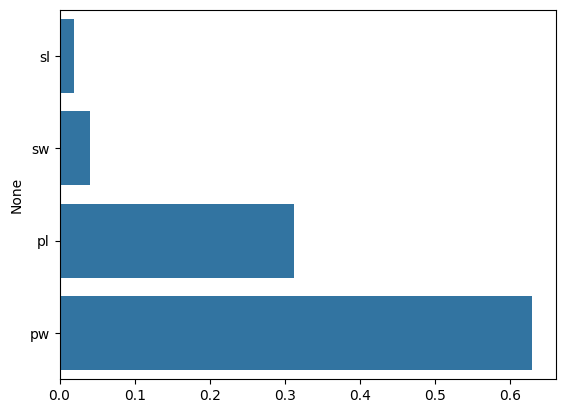

In [14]:
# 特徴量と目的変数の取得
X_train = train_df[['sl', 'sw', 'pl', 'pw']]
y_train = train_df['cs']

#学習用とテスト用に分類
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=49, stratify=y_train
)

# 勾配ブースティング
model = GradientBoostingClassifier(
    n_estimators=13,
    random_state=49,
    max_depth=3
)

model.fit(X_train, y_train)

# モデルの評価

# 予測の実行
y_pred = model.predict(X_test)

# 混同行列
cm = confusion_matrix(y_test, y_pred)

# 適合率と再現率
print(classification_report(y_test, y_pred))

# 各種評価値
cr=classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr)
pd.DataFrame(cm)

# モデルの特徴量の重要度を取得する
feature_importances = model.feature_importances_

# 特徴量の重要度をプロットする
sns.barplot(x=feature_importances, y=X_train.columns)

# テストデータで予測
y_test_pred_num = model.predict(test_df[['sl', 'sw', 'pl', 'pw']])

# 逆マッピング辞書の定義
reverse_mapping = {v: k for k, v in mapping.items()}

# 予測結果を逆マッピングで元のラベルに変換
y_test_pred_label = [reverse_mapping[pred] for pred in y_test_pred_num]

# 予測結果のデータフレームの作成
df_predictions = pd.DataFrame({
    'ID': test_df['ID'],
    'Predicted_Number': y_test_pred_num,
    'Predicted_Label': y_test_pred_label
})

# 予測結果のデータフレームの表示
print(df_predictions)

# 提出用データフレームの作成
submission = pd.DataFrame({'ID': test_df['ID'], 'class': y_test_pred_label})

# 提出用ファイルの保存
submission.to_csv('submit.csv', index=False, header=False)